# The _generalized additive machine_ 

## An application of multiple linear regression


Important note: Training currently not stable, i.e. does not always converge!

In [31]:
%reload_ext autoreload
%autoreload 2

import sys
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# necessary, since python files are in parent directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models import RegressionLearner
from train import Trainer

print(tf.__version__)

2.0.0-rc0


In [32]:
true_betas = np.array([3.5, -0.2, 0.3]).reshape(3,1)

def generate_regression_data(batch_size=64):
    X = np.random.uniform(size=(batch_size,3)).astype(np.float32)
    y = X @ true_betas + np.random.normal(scale=0.01,size=(batch_size,1))
    return X,y.astype(np.float32)

In [33]:
X,y = generate_regression_data()
print(X.shape,y.shape)

(64, 3) (64, 1)


In [34]:
model = RegressionLearner(n_features = 3,n_layers=2,n_units=1,build_interactions=False)
optim = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_func = tf.keras.losses.MeanSquaredError(name='MSE')  
metric = tf.keras.metrics.MeanSquaredError(name='Val_MSE')
n_iters_per_epoch = 300
n_epochs = 10
training = Trainer(model,optim,loss_func,metric,n_epochs,n_iters_per_epoch)

### Visualise how the features are transformed before training

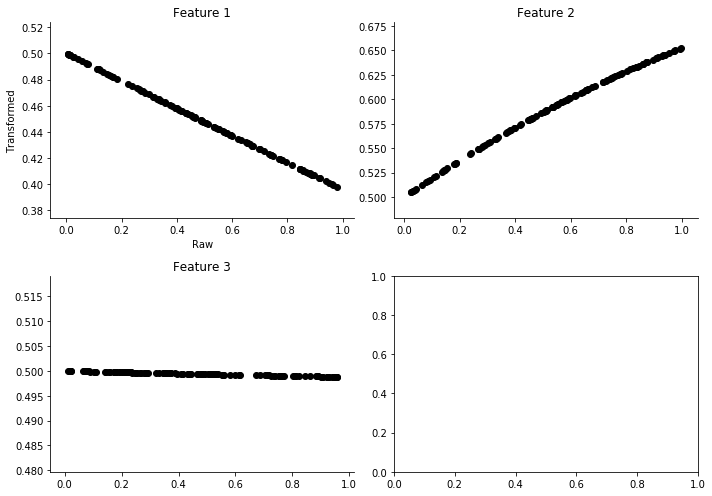

In [36]:
training.visualise_transformation(generate_regression_data,128)

### Train the architecture

In [37]:
training.run_online(generate_regression_data,128)

### Visualise how the features are transformed after training

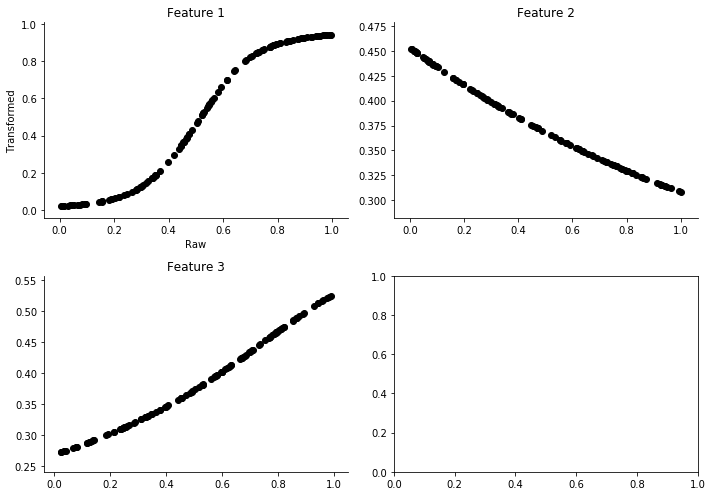

In [38]:
training.visualise_transformation(generate_regression_data,128)

### Check for similarity of learned coefficients and true ones

In [39]:
print(training.model.regression.kernel.numpy().flatten(), true_betas.flatten())

[2.533873   0.99169487 1.0504352 ] [ 3.5 -0.2  0.3]
